# Water Kernels
**NOTE**: The beam comes from $x=0,y=0,z=$HLZ

In [1]:
%pylab ipympl
from topas2numpy import BinnedResult

Populating the interactive namespace from numpy and matplotlib


In [2]:
y = BinnedResult('pytest.csv')

## First Test
Plotting $x,y,z$ data for `pytest.csv'

Text(0.5, 1.0, 'x = 5')

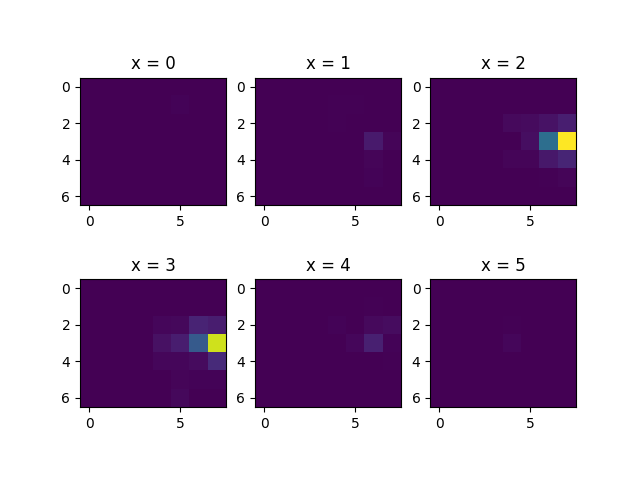

In [3]:
# print(y.unit)
# print(y.data)

# print(shape(y.data['Sum']))
# print(y.data['Sum'])

ifig=1;close(ifig);figure(ifig)
# imshow(y.data['Sum'][2])
subplot(2,3,1,sharex=gca(), sharey=gca())
imshow(y.data['Sum'][0],vmin=0,vmax=np.max(y.data['Sum']))
title('x = 0')

subplot(2,3,2,sharex=gca(), sharey=gca())
imshow(y.data['Sum'][1],vmin=0,vmax=np.max(y.data['Sum']))
title('x = 1')

subplot(2,3,3,sharex=gca(), sharey=gca())
imshow(y.data['Sum'][2],vmin=0,vmax=np.max(y.data['Sum']))
title('x = 2')

subplot(2,3,4,sharex=gca(), sharey=gca())
imshow(y.data['Sum'][3],vmin=0,vmax=np.max(y.data['Sum']))
title('x = 3')

subplot(2,3,5,sharex=gca(), sharey=gca())
imshow(y.data['Sum'][4],vmin=0,vmax=np.max(y.data['Sum']))
title('x = 4')

subplot(2,3,6,sharex=gca(), sharey=gca())
imshow(y.data['Sum'][5],vmin=0,vmax=np.max(y.data['Sum']))
title('x = 5')

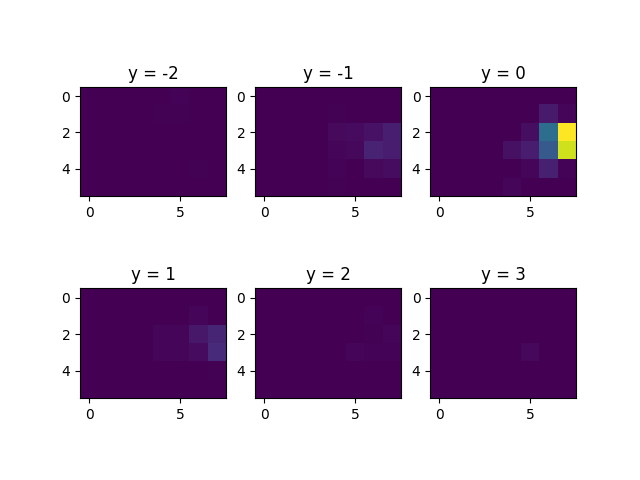

In [4]:
ifig=2;close(ifig);figure(ifig)

# omitting y = -3 bc no energy deposit there
for j in range(1,len(y.data['Sum'][0])):
    plt_y = []
    for n in range(len(y.data['Sum'])):
        plt_y.append(y.data['Sum'][n][j])
    subplot(2,3,j,sharex=gca(), sharey=gca())
    imshow(plt_y,vmin=0,vmax=np.max(y.data['Sum']))
    title('y = ' + str(j-3))


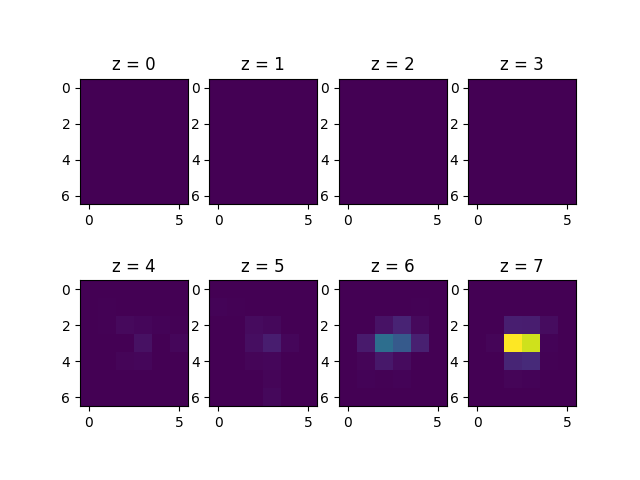

In [5]:
ifig=3;close(ifig);figure(ifig)

# this could definitely be done better with list slicing
for k in range(len(y.data['Sum'][0][0])):
    plt_z = []
    for j in range(len(y.data['Sum'][0])):
        plt_z.append([])
        for i in range(len(y.data['Sum'])):
            plt_z[j].append(y.data['Sum'][i][j][k])
    subplot(2,4,k+1,sharex=gca(), sharey=gca())
    imshow(plt_z,vmin=0,vmax=np.max(y.data['Sum']))
    title('z = ' + str(k))

## Useful Functions 

In [6]:
def scatter3d(arr,ifig=None):
    '''
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig = plt.figure(num=ifig)
    ax = fig.add_subplot(projection='3d')
    
    xc = [i for i in range(len(arr))]
    yc = [i for i in range(len(arr[0]))]
    zc = [i for i in range(len(arr[0][0]))]
    
    xv,yv = meshgrid(xc,yc)
    zv = len(xc)*len(yc)*[zc]
    
    # for i in range(len(xv)):
    #     for j in range(len(yv)):
    for n in range(len(zc)):
        colour = coorform('z',arr)[n]/np.max(arr)
        ax.scatter(xv, yv, n, marker='o',cmap='viridis',c=colour)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # fig.add_axes(ax,xlim=(min(xc),max(xc)),ylim=(min(yc),max(yc)))

    plt.show()

In [7]:
def coorform(form,arr):
    '''
    
    Parameters:
    ----------
    
    form :: str
      what form you want to have the return array in
      (i.e. 'x', 'y', 'z' correspond to x first, ...)
    
    arr :: numpy array
      array of topas voxels
    
    Returns:
    -------
    
    newarr :: numpy array
    
    '''
    newarr = []
    
    if form == 'x':
        newarr = arr
    elif form == 'y':
        for j in range(len(arr[0])):
            plt_y = []
            for n in range(len(arr)):
                plt_y.append(arr[n][j])
            newarr.append(plt_y)
    elif form == 'z':
        for k in range(len(arr[0][0])):
            plt_z = []
            for j in range(len(arr[0])):
                plt_z.append([])
                for i in range(len(arr)):
                    plt_z[j].append(arr[i][j][k])
            newarr.append(plt_z)
    else:
        print('Invalid value for form. Only allowed values are \'x\', \'y\', \'z\'')
        
    return newarr

In [8]:
'''
There is a massive bug in here for some reason... THIS CODE DOESN'T WORK!!!
'''
a = BinnedResult('WaterKernel2.csv').data['Sum']
rem_rows = {'start':0,'end':0}

# removing all the x arrays with the zeros removed - a_rm

past = False
index = -1

while not past:
    index += 1
    if not a[index].flatten().all() == 0:
        past = True
    elif index == len(a) - 1:
        past = True

a_rm = a[index:]
rem_rows['start'] = index

past = False
index = -1

while not past:
    index += 1
    if not a[len(a)-1-index].flatten().all() == 0:
        past = True
    elif index == len(a) - 1:
        past = True
        
a_rm = a_rm[:len(a)-index]
rem_rows['end'] = index

shape(a_rm)

(1, 100, 100)

In [9]:
rem_rows

{'start': 99, 'end': 99}

In [10]:
a = BinnedResult('WaterKernel2.csv').data['Sum']

In [4]:
a = BinnedResult('../Topas/RealKernel1.csv').data['Sum']

### Attempting Sliding

In [6]:
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt

def update(val):
    image = ax.imshow(a[arr_slider.val],vmin=0,vmax=np.max(a))
    fig.canvas.draw_idle()

def SlidePlot(inix,a,):
    fig, ax = plt.subplots()

    image = ax.imshow(a[inix],vmin=0,vmax=np.max(a))

    plt.subplots_adjust(left=0.25, bottom=0.25)

    axarr = plt.axes([0.25, 0.1, 0.65, 0.03])
    arr_slider = Slider(
        ax=axarr,
        label='Array Index',
        valmin=0,
        valmax=len(a)-1,
        valinit=inix,
        valstep=1,
    )

    arr_slider.on_changed(update)

    plt.show()

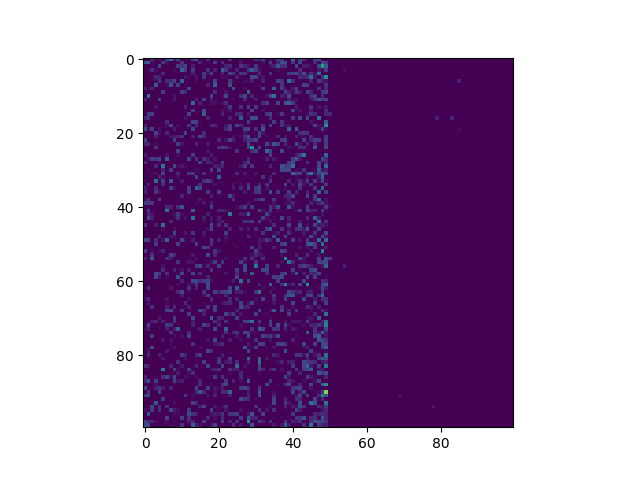

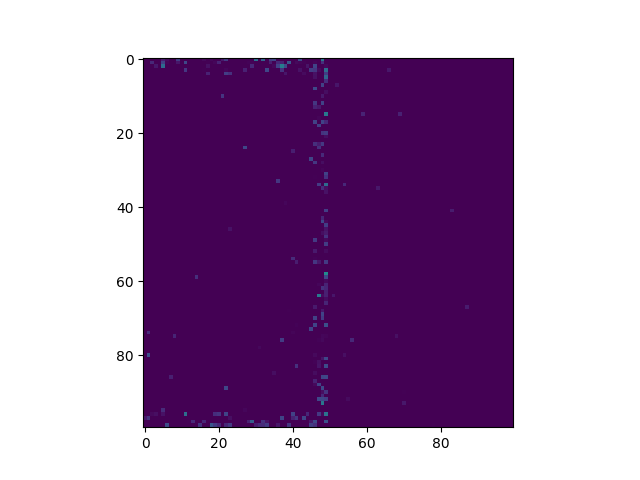

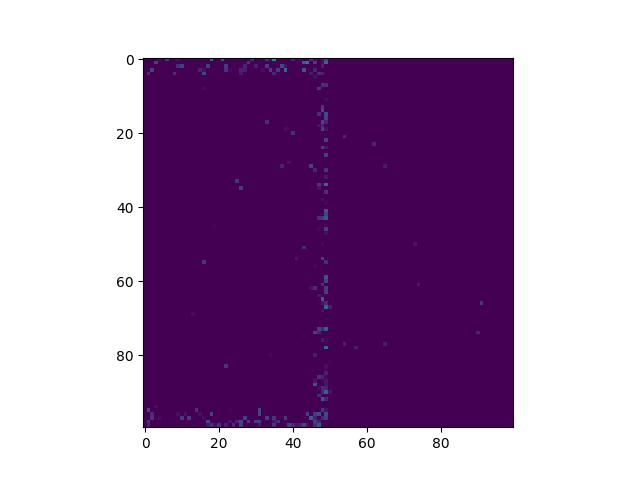

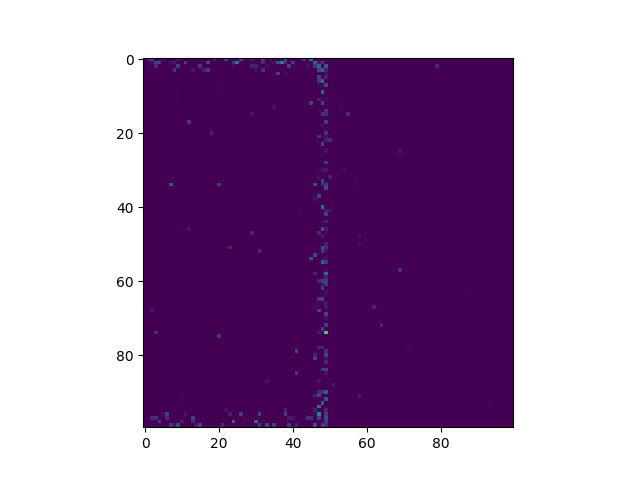

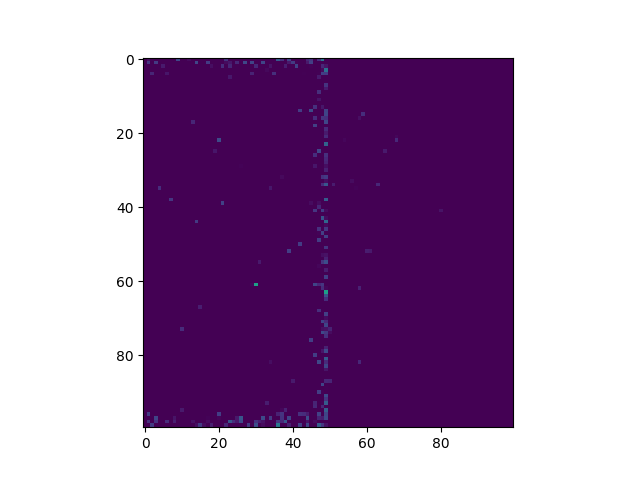

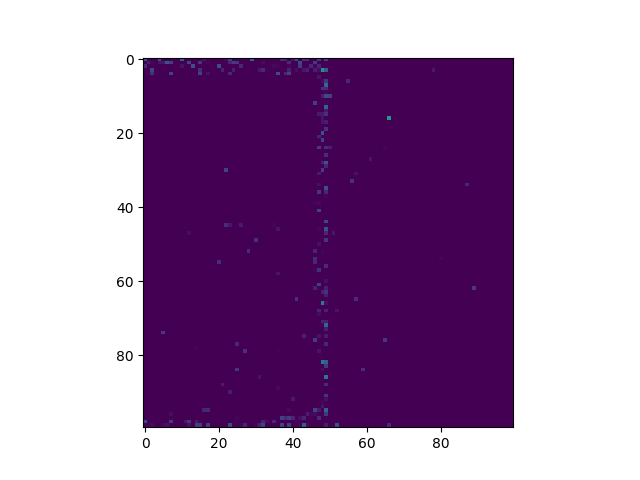

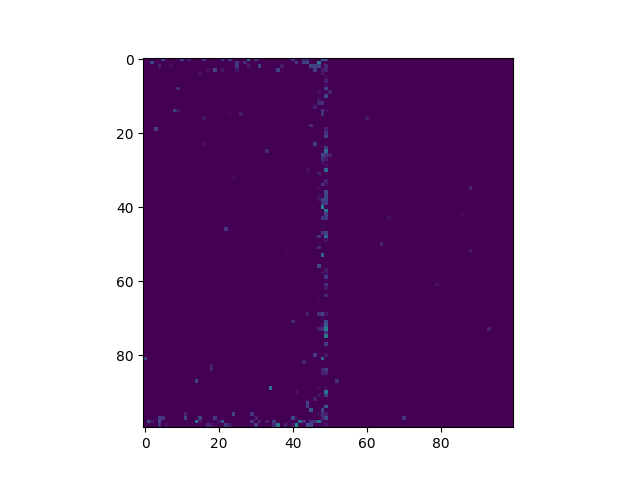

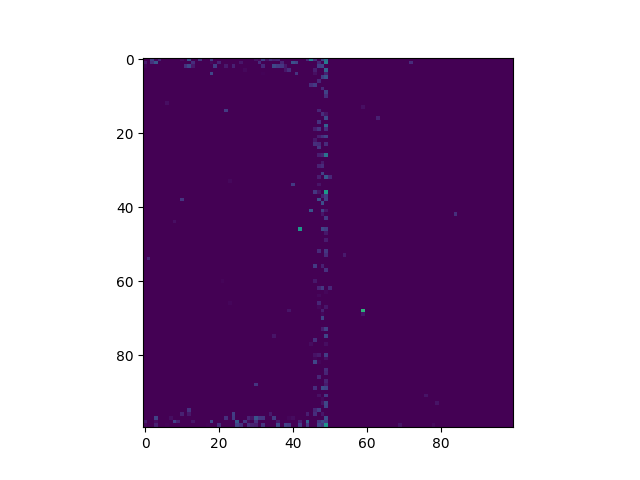

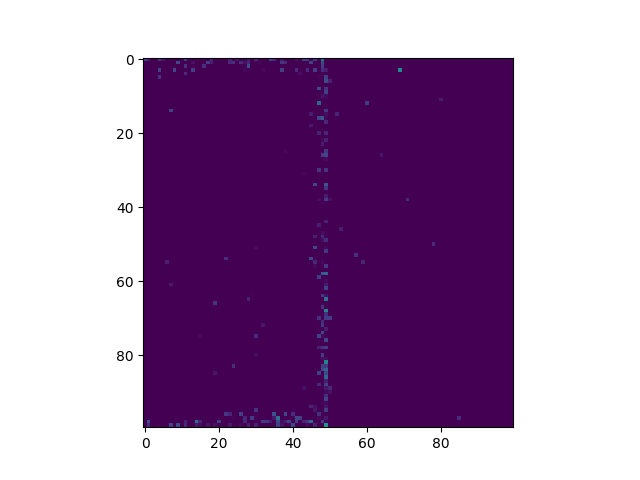

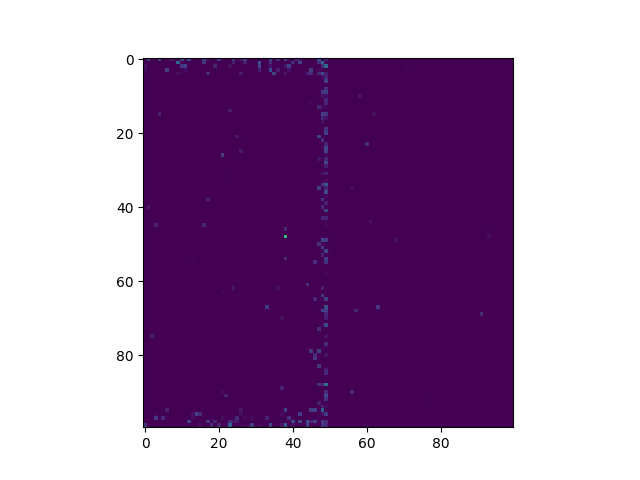

In [8]:
for n in range(0,len(a),10):
    ifig=n;close(ifig);figure(ifig)
    imshow(a[n],vmin=0,vmax=np.max(a))

In [13]:
# DOES NOT WORK
# print(y.data['Sum'])
xc = [n for n in range(len(y.data['Sum']))]
yc = [n for n in range(len(y.data['Sum'][0]))]
zc = [n for n in range(len(y.data['Sum'][0][0]))]

xv,yv = meshgrid(xc,yc)
zv = len(xc)*len(yc)*[zc]

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ifig=20;close(ifig);figure(ifig)
ax.mpl_toolkits.mplot3d.Axes3D.scatter3D(xs=xv,ys=yv,0)
# it wants the SELF attribute......... IDK what to do 

# plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-13-08d20ae911fd>, line 13)

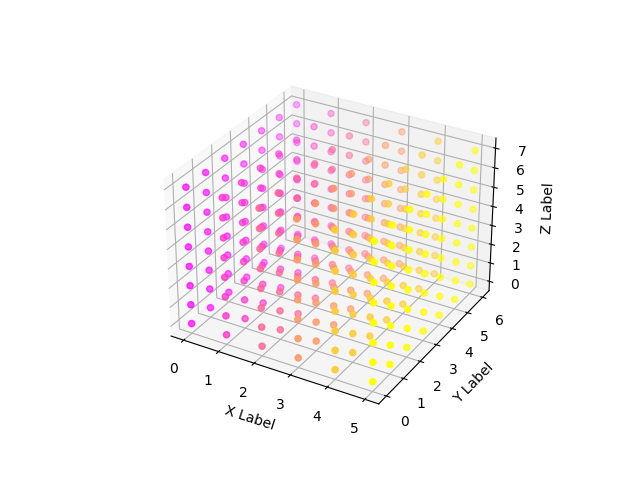

In [14]:
# BUNCH OF GARBAGE THAT IS IMPLEMENTED IN FUNCTION ABOVE
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

# for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, marker=m)

xc = [i for i in range(len(y.data['Sum']))]
yc = [i for i in range(len(y.data['Sum'][0]))]
zc = [i for i in range(len(y.data['Sum'][0][0]))]

xv,yv = meshgrid(xc,yc)
zv = len(xc)*len(yc)*[zc]

for n in range(len(zc)):
    # print(n)
    # colour = y.data['Sum'][xv][yv][n]/np.max(y.data['Sum'])
    # print(shape(colour))
    ax.scatter(xv, yv, n, marker='o',cmap='spring',c=xv)
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# ax.scatter?

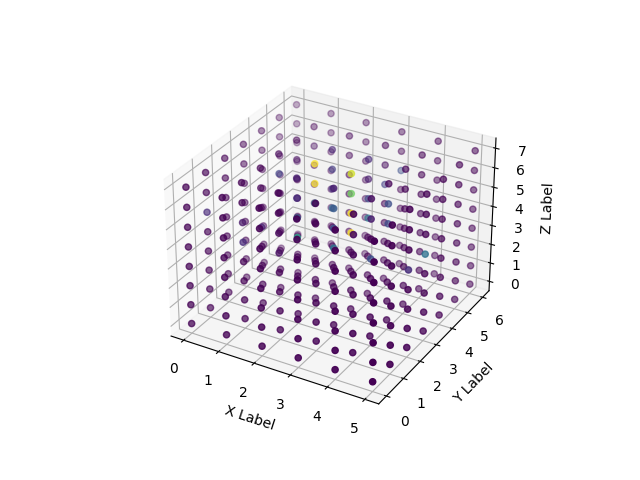

In [15]:
scatter3d(y.data['Sum'])

In [16]:
from mpl_toolkits.mplot3d import Axes3D
# mpl_toolkits.mplot3d.Axes3D.scatter3D?
# Axes3D.scatter3D?

In [34]:
def remove_zeros(arr):
    '''
    '''
    

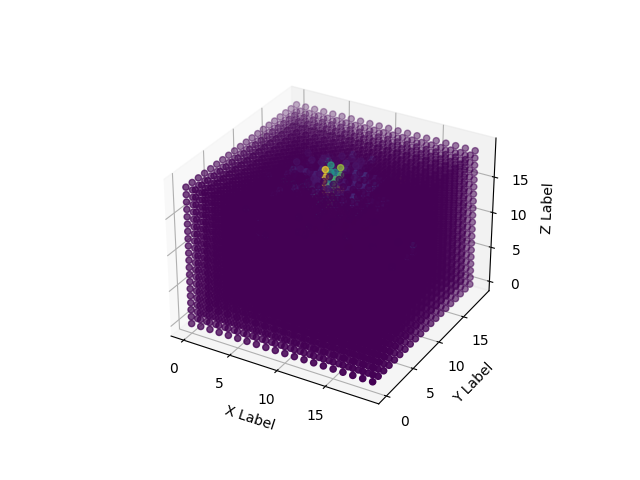

In [12]:
scatter3d(BinnedResult('WaterKernel1.csv').data['Sum'])